In [161]:
import numpy as np
from control import *
import matplotlib.pyplot as plt
import sympy as sp 
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams

In [162]:
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

In [163]:
OpenLoop = TransferFunction([20], [1, 5, 0, 0])

In [164]:
OpenLoop

TransferFunction(array([20]), array([1, 5, 0, 0]))

In [165]:
LeadCompensator = TransferFunction([0.8, 0.8], [0.0625, 1])

In [166]:
LeadCompensator

TransferFunction(array([0.8, 0.8]), array([0.0625, 1.    ]))

In [167]:
z_OpenLoop = c2d(OpenLoop, Ts=0.1)

In [168]:
z_OpenLoop

TransferFunction(array([0.00295509, 0.01048165, 0.00230203]), array([ 1.        , -2.60653066,  2.21306132, -0.60653066]), 0.1)

In [169]:
Ts= 0.1
z = tf("z")
s = (z-1)/(Ts*z)

In [170]:
s

TransferFunction(array([ 1, -1]), array([0.1, 0. ]), True)

In [173]:
SimpleMethod = 0.8*(1+s)/(1+0.0625*s)

In [174]:
SimpleMethod

TransferFunction(array([ 0.088, -0.08 ,  0.   ]), array([ 0.01625, -0.00625,  0.     ]), True)

In [175]:
TustinMethod = sample_system(LeadCompensator, Ts=0.1, method="tustin")

In [176]:
TustinMethod

TransferFunction(array([ 7.46666667, -6.75555556]), array([ 1.        , -0.11111111]), 0.1)

In [177]:
t = np.arange(0.,5., 0.1)

In [178]:
t

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [181]:
SeriesCont = series(OpenLoop, LeadCompensator)

In [182]:
SeriesCont

TransferFunction(array([16., 16.]), array([0.0625, 1.3125, 5.    , 0.    , 0.    ]))

In [183]:
CLCont = feedback(SeriesCont)

In [184]:
CLCont

TransferFunction(array([16., 16.]), array([ 0.0625,  1.3125,  5.    , 16.    , 16.    ]))

In [185]:
T, yout = step_response(CLCont, t)

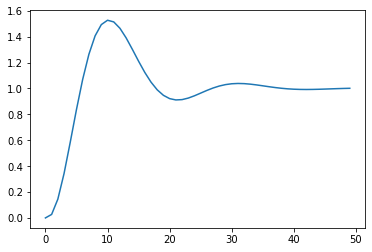

In [186]:
plt.plot(yout)

In [187]:
SimpleSeries = series(z_OpenLoop, SimpleMethod)

In [188]:
SimpleSeries

TransferFunction(array([ 0.00026005,  0.00068598, -0.00063595, -0.00018416,  0.        ]), array([ 0.01625   , -0.04860612,  0.05225306, -0.02368776,  0.00379082,
        0.        ]), 0.1)

In [189]:
#simple method
SimpleClosedLoop = feedback(SimpleSeries)
_, simple = step_response(SimpleClosedLoop, t)


In [190]:
#tustin method
TustinSeries = series(z_OpenLoop, TustinMethod)
TustinClosedLoop = feedback(TustinSeries)
_, tustin = step_response(TustinClosedLoop, t)

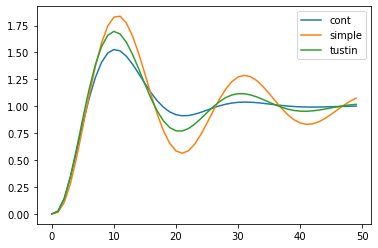

In [191]:
plt.plot(yout, label="cont")
plt.plot(simple, label="simple")
plt.plot(tustin, label="tustin")
plt.legend()

In [192]:
znum = TustinClosedLoop.num[0][0]
zden = TustinClosedLoop.den[0][0]

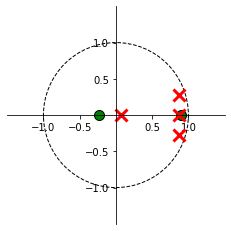

(array([-3.31175265,  0.9047619 , -0.23522389]),
 array([0.87642398+0.28145093j, 0.87642398-0.28145093j,
        0.87261687+0.j        , 0.07011223+0.j        ]),
 0.39047620350673506)

In [193]:
zplane(znum, zden)

(array([[-1.71559844e+01  +0.j        , -1.40427437e+00  +0.j        ,
         -1.21987062e+00  -3.02290884j, -1.21987062e+00  +3.02290884j],
        [-1.71559844e+01  +0.j        , -1.40427437e+00  +0.j        ,
         -1.21987062e+00  -3.02290884j, -1.21987062e+00  +3.02290884j],
        [-1.84387282e+01  +0.j        , -1.11202641e+00  +0.j        ,
         -7.24622710e-01  -5.53504541j, -7.24622710e-01  +5.53504541j],
        [-1.94493272e+01  +0.j        , -1.06525452e+00  +0.j        ,
         -2.42709124e-01  -7.01886431j, -2.42709124e-01  +7.01886431j],
        [-2.03002523e+01  +0.j        , -1.04605342e+00  +0.j        ,
          1.73152881e-01  -8.13186438j,  1.73152881e-01  +8.13186438j],
        [-2.10437107e+01  +0.j        , -1.03558690e+00  +0.j        ,
          5.39648817e-01  -9.04136724j,  5.39648817e-01  +9.04136724j],
        [-2.33885620e+01  +0.j        , -1.01864397e+00  +0.j        ,
          1.70360301e+00 -11.68047508j,  1.70360301e+00 +11.68047508j],

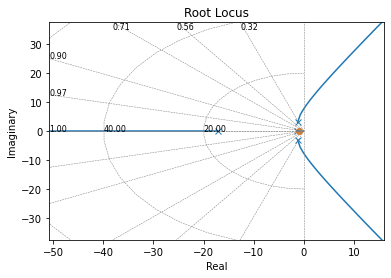

In [195]:
rlocus(CLCont)